# Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier


# Part a

## Data Preparation

In [30]:
df_pop_failures = pd.read_csv('/content/drive/MyDrive/Data Mining/HW3/new-datasets/Q7/pop_failures.csv')
df_pop_failures.head()

,Unnamed: 0,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


In [31]:
df_pop_failures.drop('Unnamed: 0', axis=1, inplace=True)

In [40]:
X = df_pop_failures.drop('outcome', axis=1)
y = df_pop_failures['outcome']
X.shape, y.shape

((540, 20), (540,))

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Models

In [42]:
models = {
  'knn': KNeighborsClassifier(), 
  'svm': SVC(random_state=1), 
  'bayes': GaussianNB(),
}
models

{'bayes': GaussianNB(),
 'knn': KNeighborsClassifier(),
 'svm': SVC(random_state=1)}

In [43]:
results = []
names = []
for name, model in models.items():
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=10)
  results.append(np.mean(scores))
  names.append(name)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


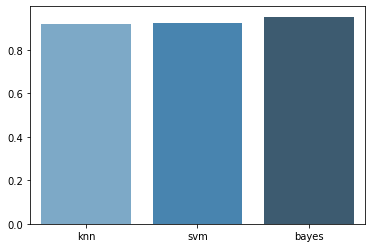

In [44]:
# sns.set_theme(style="whitegrid")
sns.barplot(names, results, palette="Blues_d")

In [51]:
for i in range(len(results)):
  print(f'{names[i]}: {results[i]}')

knn: 0.9203703703703703
svm: 0.924074074074074
bayes: 0.951851851851852


We can conclude that bayes has performed better than other models. Aslo SVM has performed better than KNN.

# Part b

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((432, 20), (108, 20), (432,), (108,))

In [47]:
base_model = []
base_model.append(('knn', KNeighborsClassifier()))
base_model.append(('svm', SVC()))
base_model.append(('bayes', GaussianNB()))

meta_model = LogisticRegression()
stacked_model = StackingClassifier(estimators=base_model, final_estimator=meta_model, cv=10)

In [48]:
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_pred, y_test)}')

Test Accuracy: 0.9537037037037037
